In [1]:
import pandas as pd

In [29]:
df=pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


**CHECKING NULL VALUES**

In [30]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**OUTLIER DETECTION**

In [31]:
def quantiles():
    q1=df.quantile(0.25)
    q3=df.quantile(0.50)
    iqr=q3-q1
    lb=q1-1.5*(iqr)
    print(lb)
    ub=q3+1.5*(iqr)
    print(ub)
quantiles()

TV          -38.6875
Radio        -9.4125
Newspaper    -6.7500
Sales         3.5000
dtype: float64
TV           262.8125
Radio         42.2875
Newspaper     45.2500
Sales         23.5000
dtype: float64


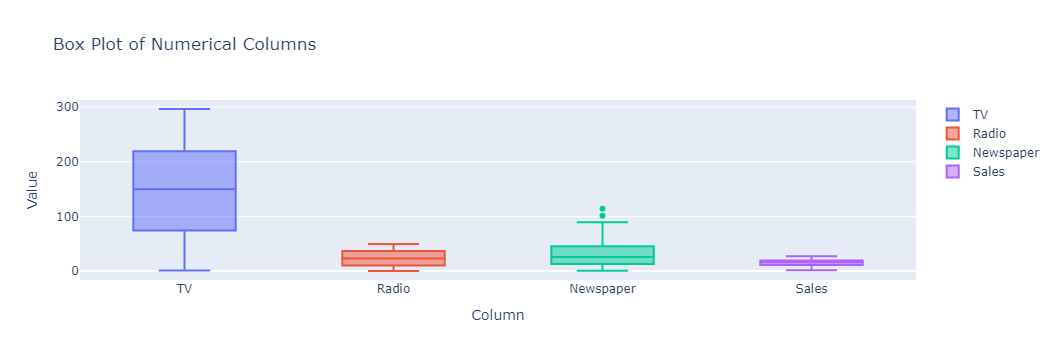

In [32]:
import plotly.graph_objects as go
fig = go.Figure()

for column in df.columns:
    fig.add_trace(go.Box(
        y=df[column],
        name=column
    ))

# Update layout
fig.update_layout(
    title="Box Plot of Numerical Columns",
    yaxis_title="Value",
    xaxis_title="Column"
)

# Show the plot
fig.show()

In [33]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [34]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [35]:
df=df[(df['Newspaper']>=6) &( df['Newspaper']<=45)]
df

,TV,Radio,Newspaper,Sales
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
9,199.8,2.6,21.2,15.6
10,66.1,5.8,24.2,12.6
13,97.5,7.6,7.2,13.7
...,...,...,...,...
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8


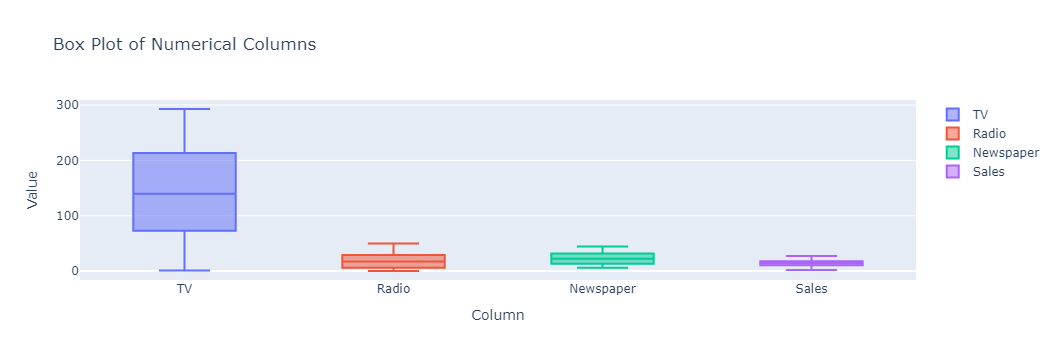

In [36]:
import plotly.graph_objects as go
fig = go.Figure()

for column in df.columns:
    fig.add_trace(go.Box(
        y=df[column],
        name=column
    ))

# Update layout
fig.update_layout(
    title="Box Plot of Numerical Columns",
    yaxis_title="Value",
    xaxis_title="Column"
)

# Show the plot
fig.show()

**HEATMAP TO SEE THE CORRELATION**

In [38]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054938,0.061978,0.893424
Radio,0.054938,1.000000,0.138383,0.331562
Newspaper,0.061978,0.138383,1.000000,0.082988
Sales,0.893424,0.331562,0.082988,1.000000


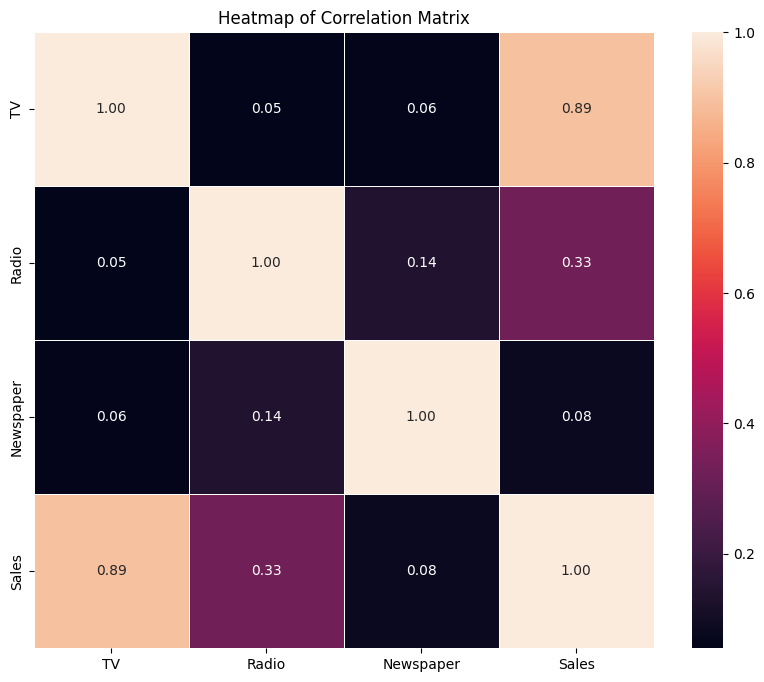

In [37]:
import matplotlib.pyplot as plt
import seaborn as sn
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

**UNIVARIANT ANALYSIS**

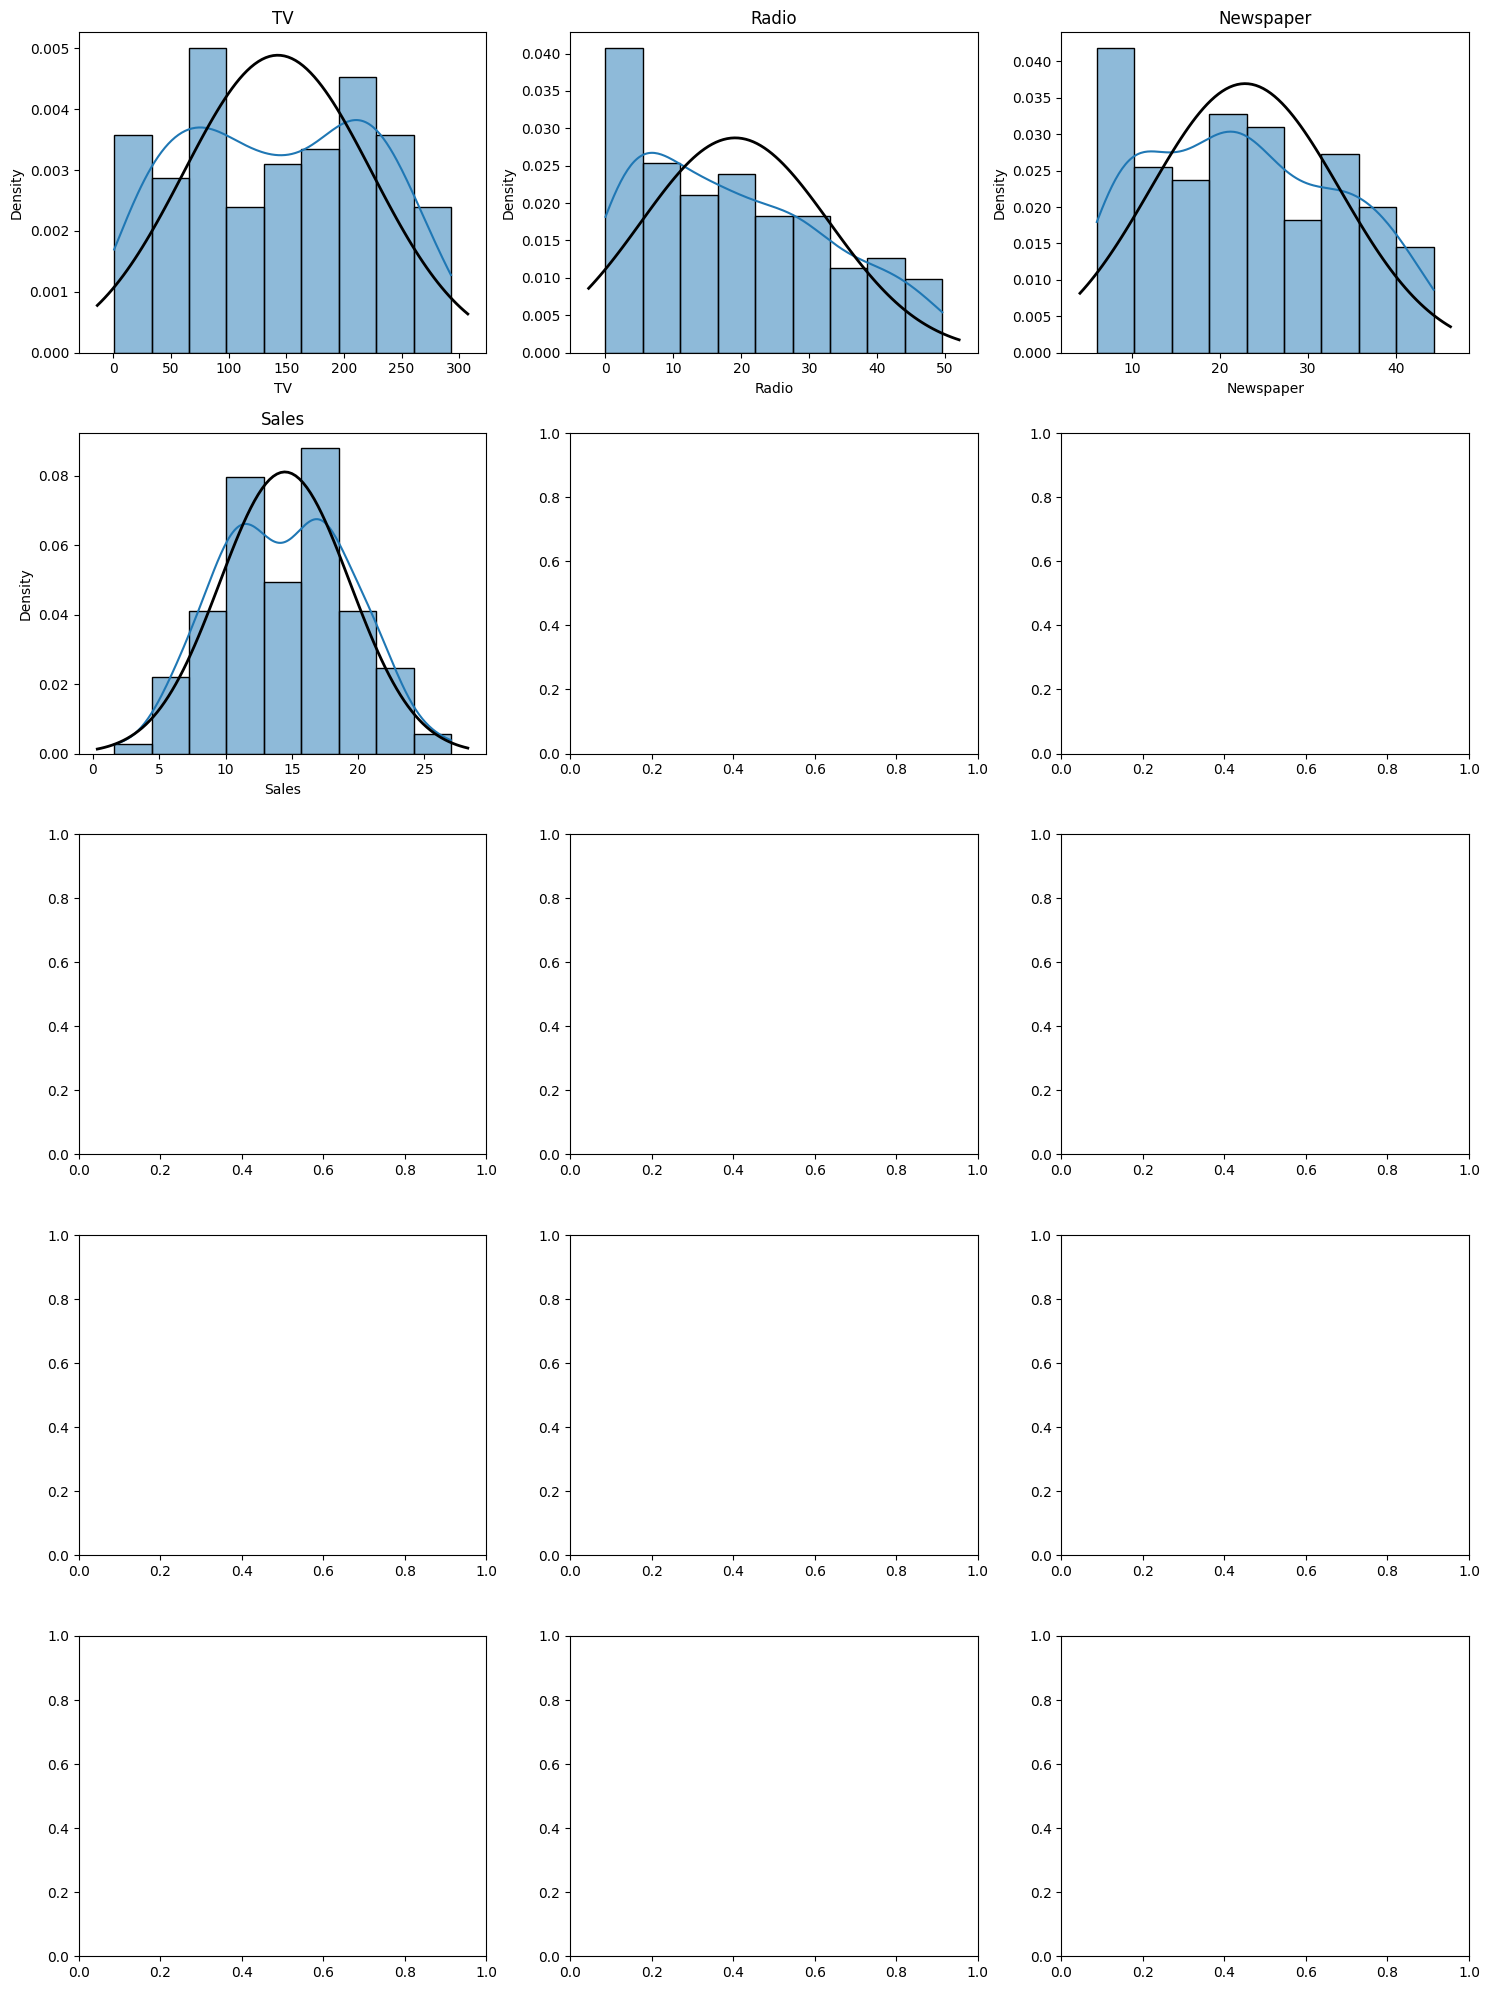

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np
# Load the dataset
data = df
# Plot histograms with normal distribution fit
columns = data.columns
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

for i, column in enumerate(columns):
    sns.histplot(data[column], kde=True, ax=axes[i//3, i%3], stat="density")
    mu, std = norm.fit(data[column])
    xmin, xmax = axes[i//3, i%3].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i//3, i%3].plot(x, p, 'k', linewidth=2)
    axes[i//3, i%3].set_title(f'{column}')
    axes[i//3, i%3].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [42]:
df

,TV,Radio,Newspaper,Sales
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
9,199.8,2.6,21.2,15.6
10,66.1,5.8,24.2,12.6
13,97.5,7.6,7.2,13.7
...,...,...,...,...
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8


In [46]:
x=df.drop(columns=['Sales'])
x

,TV,Radio,Newspaper
6,57.5,32.8,23.5
7,120.2,19.6,11.6
9,199.8,2.6,21.2
10,66.1,5.8,24.2
13,97.5,7.6,7.2
...,...,...,...
194,149.7,35.6,6.0
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4


In [47]:
y=df['Sales']
y

6      11.8
7      13.2
9      15.6
10     12.6
13     13.7
       ... 
194    17.3
195     7.6
196    14.0
197    14.8
199    18.4
Name: Sales, Length: 129, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [55]:
x_train

,TV,Radio,Newspaper
114,78.2,46.8,34.5
129,59.6,12.0,43.1
73,129.4,5.7,31.3
6,57.5,32.8,23.5
27,240.1,16.7,22.9
...,...,...,...
172,19.6,20.1,17.0
29,70.6,16.0,40.8
149,44.7,25.8,20.6
78,5.4,29.9,9.4


In [56]:
y_train

114    14.6
129     9.7
73     11.0
6      11.8
27     20.9
       ... 
172     7.6
29     10.5
149    10.1
78      5.3
166     8.0
Name: Sales, Length: 103, dtype: float64

In [93]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [94]:
train=lr.fit(x_train,y_train)
train

LinearRegression()

In [95]:
predicted=lr.predict(x_test)
predicted

array([11.03455241, 16.1096311 , 21.08642666, 20.80238081, 13.59948194,
       12.90464313, 18.17665074,  8.69488536, 11.72892097, 16.69276236,
       18.12711309, 10.90808726, 16.75721933, 10.80634654, 13.28693739,
       16.95305033, 19.0353123 , 19.96533377, 21.7536226 , 10.40940678,
       10.142869  , 19.63137244, 12.82148317, 15.33907804, 16.2140817 ,
       12.36710718])

In [96]:
y_test

82     11.3
64     16.0
35     17.8
52     22.6
180    15.5
83     13.6
113    20.9
170     8.4
135    11.6
45     16.1
153    16.0
46     10.6
103    19.7
13     13.7
157    10.1
162    19.9
59     18.4
131    17.7
150    16.1
140    10.9
34     11.9
25     17.0
186    10.3
26     15.0
194    17.3
71     12.4
Name: Sales, dtype: float64

**FINDING ACCURACY**

In [97]:
mape=100- (((abs(y_test - predicted )/y_test).mean())*100)
mape

88.99313955823963

**HYPER PARAMETER TUNING**

**GRID SEARCH**

In [98]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np
# Define the model
model = Ridge()

# Define the hyperparameters to search
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters found: ", best_params)

# Predict and evaluate the model
y_pred = best_model.predict(x_test)
mape=100- (((abs(y_test - predicted )/y_test).mean())*100)
mape

Best parameters found:  {'alpha': 100.0}


88.99313955823963

In [99]:
x_train

,TV,Radio,Newspaper
114,78.2,46.8,34.5
129,59.6,12.0,43.1
73,129.4,5.7,31.3
6,57.5,32.8,23.5
27,240.1,16.7,22.9
...,...,...,...
172,19.6,20.1,17.0
29,70.6,16.0,40.8
149,44.7,25.8,20.6
78,5.4,29.9,9.4


In [100]:
x_test

,TV,Radio,Newspaper
82,75.3,20.3,32.5
64,131.1,42.8,28.9
35,290.7,4.1,8.5
52,216.4,41.7,39.6
180,156.6,2.6,8.3
83,68.4,44.5,35.6
113,209.6,20.6,10.7
170,50.0,11.6,18.4
135,48.3,47.0,8.5
45,175.1,22.5,31.5


In [101]:
y_train

114    14.6
129     9.7
73     11.0
6      11.8
27     20.9
       ... 
172     7.6
29     10.5
149    10.1
78      5.3
166     8.0
Name: Sales, Length: 103, dtype: float64

In [102]:
x=df.drop(columns=['Sales'])
x

,TV,Radio,Newspaper
6,57.5,32.8,23.5
7,120.2,19.6,11.6
9,199.8,2.6,21.2
10,66.1,5.8,24.2
13,97.5,7.6,7.2
...,...,...,...
194,149.7,35.6,6.0
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4


In [103]:
y=df['Sales']
y

6      11.8
7      13.2
9      15.6
10     12.6
13     13.7
       ... 
194    17.3
195     7.6
196    14.0
197    14.8
199    18.4
Name: Sales, Length: 129, dtype: float64

**RANDOM FOREST**

In [104]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np



# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor()

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]             # Minimum number of samples required to be at a leaf node
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters found: ", best_params)

# Predict and evaluate the model
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)


Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error:  3.474382539296534


In [105]:
mape=100- (((abs(y_test - predicted )/y_test).mean())*100)
mape

88.99313955823963

In [108]:
from sklearn.linear_model import Lasso
la=Lasso()

In [109]:
train=la.fit(x_train,y_train)
train

Lasso()

In [110]:
predicted=la.predict(x_test)
predicted

array([10.95091681, 15.95489648, 21.27233443, 20.56316607, 13.79483941,
       12.68728739, 18.27129227,  8.76719279, 11.72520952, 16.6067777 ,
       17.91294804, 10.84425501, 16.80753786, 10.98897369, 13.35552402,
       16.93551611, 19.10180216, 19.87082056, 21.65959337, 10.50299906,
       10.35154255, 19.72900177, 12.86751501, 15.3796582 , 16.28118097,
       12.31661848])

In [112]:
mape=100- (((abs(y_test - predicted )/y_test).mean())*100)
mape

89.07776753101194

In [113]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np



# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor()

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]             # Minimum number of samples required to be at a leaf node
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters found: ", best_params)

# Predict and evaluate the model
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)


Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error:  3.2552060882323843


In [114]:
mape=100- (((abs(y_test - predicted )/y_test).mean())*100)
mape

89.07776753101194